In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, GRU
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_merged.csv")


In [3]:
X = data.drop('Behavior', axis=1)
y = data['Behavior']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the input features
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_test.mean()) / X_test.std()

# Reshape input data for RNN
timesteps = 1
X_train_reshaped = X_train_normalized.values.reshape(-1, timesteps, X_train.shape[1])
X_test_reshaped = X_test_normalized.values.reshape(-1, timesteps, X_test.shape[1])

y_train_onehot = np_utils.to_categorical(y_train, num_classes)

# Build the RNN model with reduced complexity and L2 regularization
model = Sequential()

model.add(LSTM(64, input_shape=(timesteps, X_train.shape[1]), return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train_onehot, epochs=10, batch_size=256, validation_split=0.1, callbacks=[early_stopping], verbose=1)


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
986/986 [==============================] - 40s 19ms/step - loss: 1.4898 - accuracy: 0.5562 - val_loss: 1.0437 - val_accuracy: 0.6049
Epoch 2/10
986/986 [==============================] - 12s 12ms/step - loss: 0.7421 - accuracy: 0.7596 - val_loss: 0.4861 - val_accuracy: 0.8683
Epoch 3/10
986/986 [==============================] - 13s 13ms/step - loss: 0.4122 - accuracy: 0.8919 - val_loss: 0.3348 - val_accuracy: 0.9079
Epoch 4/10
986/986 [==============================] - 13s 14ms/step - loss: 0.3183 - accuracy: 0.9121 - val_loss: 0.2773 - val_accuracy: 0.9163
Epoch 5/10
986/986 [==============================] - 14s 14ms/step - loss: 0.2707 - accuracy: 0.9214 - val_loss: 0.2390 - val_accuracy: 0.9270
Epoch 6/10
986/986 [==============================] - 14s 14ms/step - loss: 0.2363 - accuracy: 0.9369 - val_loss: 0.2094 - val_accuracy: 0.9465
Epoch 7/10
986/986 [==============================] - 14s 14ms/step - loss: 0.2108 - accuracy: 0.9482 - val_loss: 0.1889 - val_accuracy:

In [4]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test_reshaped, np_utils.to_categorical(y_test, num_classes), verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1512
Test Accuracy: 0.9613


2191/2191 [==============================] - 9s 4ms/step


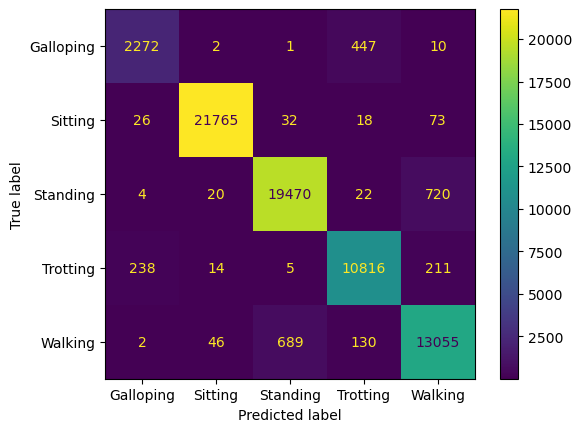

              precision    recall  f1-score   support

   Galloping       0.89      0.83      0.86      2732
     Sitting       1.00      0.99      0.99     21914
    Standing       0.96      0.96      0.96     20236
    Trotting       0.95      0.96      0.95     11284
     Walking       0.93      0.94      0.93     13922

    accuracy                           0.96     70088
   macro avg       0.95      0.94      0.94     70088
weighted avg       0.96      0.96      0.96     70088



In [12]:
# Predict labels on the test data
y_pred_prob = model.predict(X_test_reshaped)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(np_utils.to_categorical(y_test, num_classes), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking'])
disp.plot()
plt.show()

# Print classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking']))